#Аналогия с PyTorch

In [59]:
import torch
import numpy as np
import random


np.random.seed(0)
random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)


data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [60]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")



Random Tensor: 
 tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [61]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [62]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cpu


In [63]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64, worker_init_fn=np.random.seed(0), num_workers=0)
test_dataloader = DataLoader(test_data, batch_size=64, worker_init_fn=np.random.seed(0), num_workers=0)

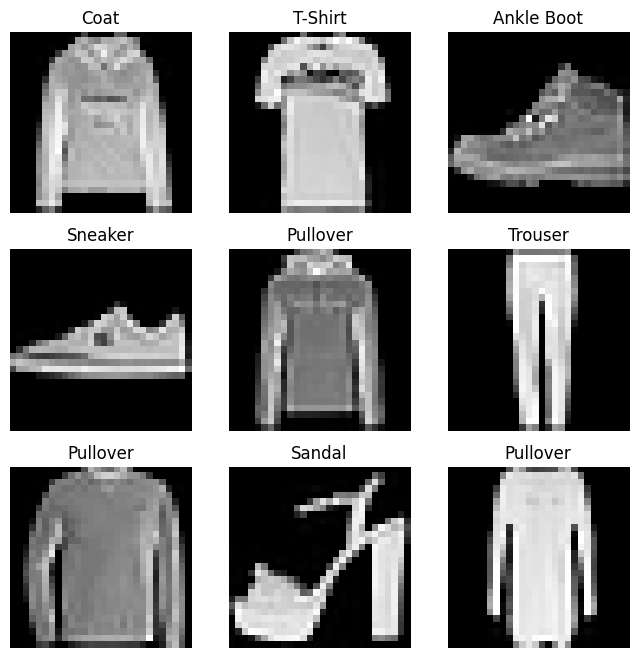

In [64]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [65]:
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [66]:
device = "cpu"

model = NeuralNetwork().to(device)
print(model)

X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)
Predicted class: tensor([3])


In [67]:
input_image = torch.rand(3,28,28)
print(input_image.size())

flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 28, 28])
torch.Size([3, 784])
torch.Size([3, 20])


In [68]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [69]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)
loss.backward()
print(w.grad)
print(b.grad)

Gradient function for z = <AddBackward0 object at 0x0000024939B0BF10>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x0000024939B0BDF0>
tensor([[0.0527, 0.0099, 0.3289],
        [0.0527, 0.0099, 0.3289],
        [0.0527, 0.0099, 0.3289],
        [0.0527, 0.0099, 0.3289],
        [0.0527, 0.0099, 0.3289]])
tensor([0.0527, 0.0099, 0.3289])


In [70]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [71]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [72]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.297958  [    0/60000]
loss: 1.394587  [ 6400/60000]
loss: 1.276299  [12800/60000]
loss: 1.704265  [19200/60000]
loss: 1.464753  [25600/60000]
loss: 1.369066  [32000/60000]
loss: 1.484664  [38400/60000]
loss: 1.386333  [44800/60000]
loss: 1.309383  [51200/60000]
loss: 1.611396  [57600/60000]
Test Error: 
 Accuracy: 55.8%, Avg loss: 1.225588 

Epoch 2
-------------------------------
loss: 0.947898  [    0/60000]
loss: 0.983876  [ 6400/60000]
loss: 1.062283  [12800/60000]
loss: 1.355248  [19200/60000]
loss: 1.082766  [25600/60000]
loss: 1.150000  [32000/60000]
loss: 1.247969  [38400/60000]
loss: 1.255364  [44800/60000]
loss: 1.126085  [51200/60000]
loss: 1.602336  [57600/60000]
Test Error: 
 Accuracy: 56.0%, Avg loss: 1.203128 

Epoch 3
-------------------------------
loss: 0.921981  [    0/60000]
loss: 0.958183  [ 6400/60000]
loss: 1.000998  [12800/60000]
loss: 1.303448  [19200/60000]
loss: 1.076474  [25600/60000]
loss: 1.194505  [32000/600